In [1]:
import sys

PWD = '../..'
sys.path.append(PWD)

import numpy as np

from matplotlib import pyplot as plt

from src.plot_utils import plot_sample
from src.cfd import CFD
from src.cfd_utils import calculate_event_cfd, find_diff_hist_stats

# Load data

In [2]:
file_name = 'Ntuple_runsampic_166_runtelescope_643_filtered.npz'
all_events = np.load(f'{PWD}/data/filtered/{file_name}', allow_pickle=True)['arr_0'].flat[0]

all_events.keys()

dict_keys([17, 11, 23, 16, 24, 29, 28, 22, 10])

# Timestamp difference

17...
channel:  17
Best: fraction=0.20, std=0.0702 (mean=0.1247)


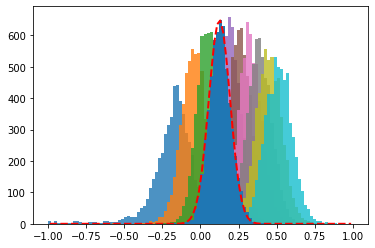

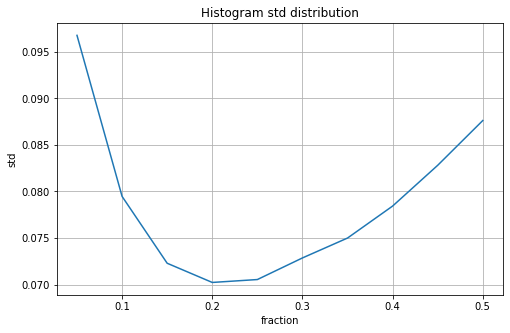

channel:  0
Best: fraction=0.10, std=0.0700 (mean=0.1810)


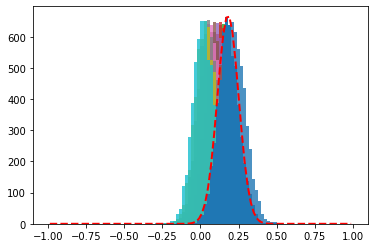

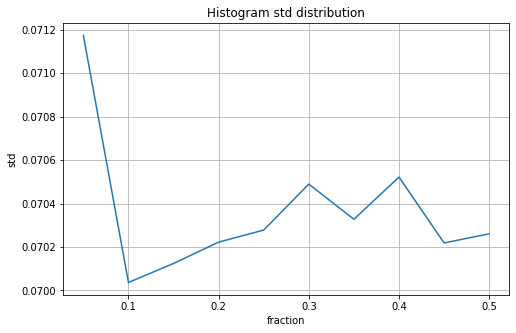

11...
channel:  11
Best: fraction=0.25, std=0.0642 (mean=0.1743)


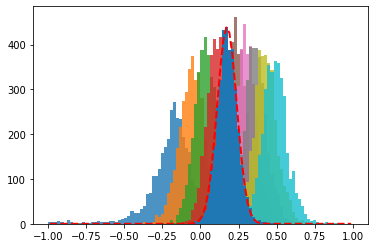

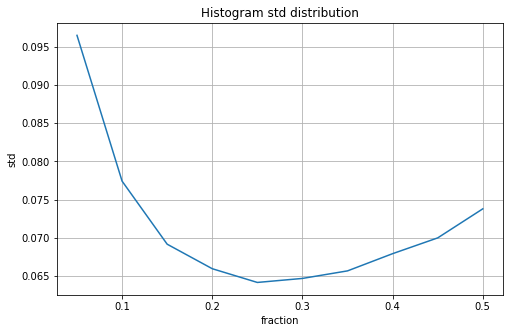

channel:  0
Best: fraction=0.30, std=0.0634 (mean=0.1343)


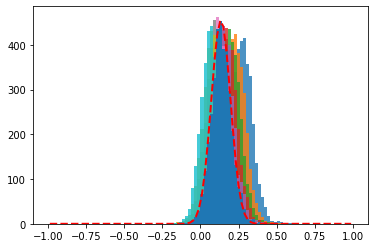

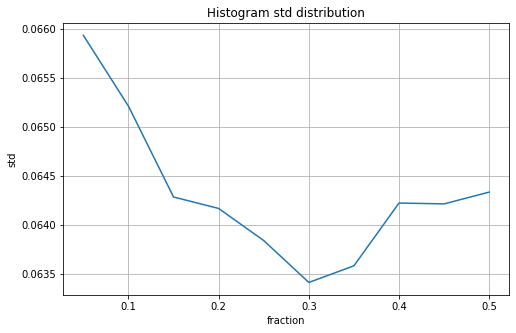

23...
channel:  23
Best: fraction=0.25, std=0.0613 (mean=-0.1742)


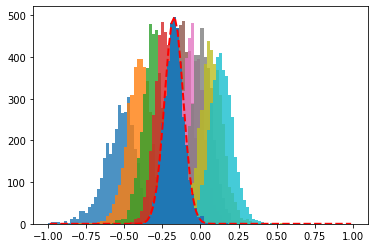

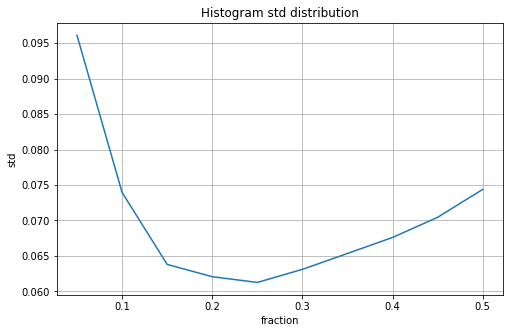

channel:  0
Best: fraction=0.20, std=0.0613 (mean=-0.1742)


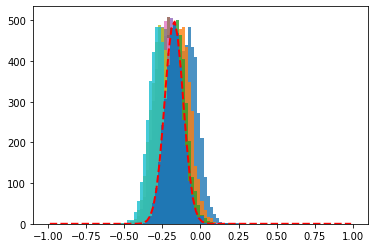

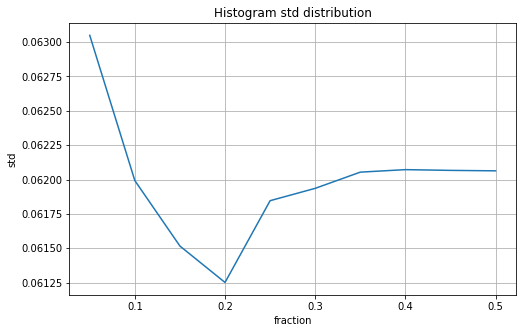

16...
channel:  16
Best: fraction=0.25, std=0.0672 (mean=0.2995)


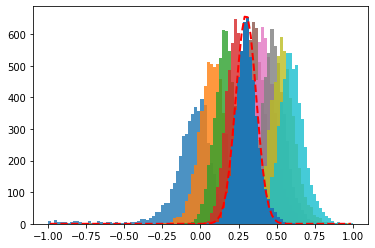

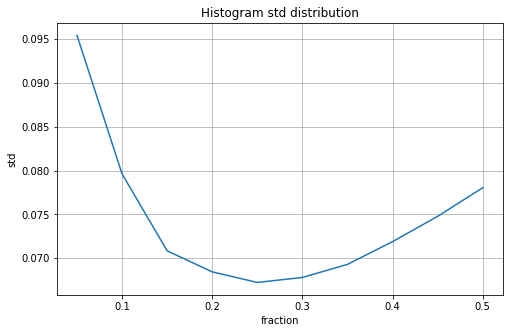

channel:  0


In [ ]:
X_RANGE = np.arange(0.05, 0.51, 0.05)
best_fractions = {}

for channel, events in all_events.items():
    print(f'{channel}...')
    cfd = [CFD(),CFD()]
    
    cfd[0].fraction = 0.2
    for y, c in reversed(list(enumerate([0, channel]))):
        stds = []
        means = []
        print("channel: ",c)
        for frac in X_RANGE:
            cfd[y].fraction = frac
            mean, std = find_diff_hist_stats(cfd, events, show=False, hist_range=(-1., 1.), hist_alpha=0.8, hist_label=f'{frac:0.2f}', plot_gauss=False)
            # print(f'fraction={frac:0.2f}, std={std:0.4f}')
            means.append(mean)
            stds.append(std)
            # plt.close()
        
        stds = np.array(stds)
        best_idx = np.argmin(stds)
        print(f'Best: fraction={X_RANGE[best_idx]:0.2f}, std={stds[best_idx]:0.4f} (mean={means[best_idx]:0.4f})')
        best_fractions[channel] = X_RANGE[best_idx]

        cfd[y].fraction = best_fractions[channel]
        find_diff_hist_stats(cfd, events, show=True, hist_range=(-1., 1.), hist_label=f'{frac:0.2f}', plot_gauss=True)

        plt.figure(figsize=(8, 5))
        plt.plot(X_RANGE, stds)
        plt.title('Histogram std distribution')
        plt.xlabel('fraction')
        plt.ylabel('std')
        plt.grid()
        plt.show()
    
    print('=======================================================================================================')